In [ ]:
using DrWatson
@quickactivate "APLG"
include(srcdir("travelling.jl"));
include(srcdir("pdes.jl"));
include(srcdir("sims.jl"));
include(srcdir("plotting.jl"));
include(srcdir("phase_diag.jl"));

# Compute the binodal and spinodal lines

In [2]:
Pe = 6; # Péclet number
Δϕ = 0.05; # step size in ϕp (paper had a fine grid of 0.001)


In [3]:
# this command either loads the binodal from the file or computes it if it is not found
γs, ϕ1s, ϕ2s = return_binodal(Pe = Pe);

computing binodal: Pe=6
saved: Pe=6


In [4]:
# this command either loads the spinodal from the file or computes it if it is not found
# ϕp_max is the maximum value of ϕp to consider
# Δϕ is the step size in ϕp
ϕas_left, ϕas_right, ϕps, indl, indr = return_spin(;Pe = Pe, ϕp_max = 0.2, Δϕ =Δϕ);

computing: Δϕ=0.05_Pe=6
doing ϕp = 0.001
found [ϕal, ϕar, ϕp] = [0.483, 0.876, 0.001]
doing ϕp = 0.05
found [ϕal, ϕar, ϕp] = [0.5, 0.807, 0.05]
doing ϕp = 0.1
found [ϕal, ϕar, ϕp] = [0.488, 0.743, 0.1]
doing ϕp = 0.15
found [ϕal, ϕar, ϕp] = [0.482, 0.673, 0.15]
doing ϕp = 0.2
found [ϕal, ϕar, ϕp] = [0.494, 0.585, 0.2]
doing ϕa = 0.495
found [ϕa, ϕp] = [0.495, 0.201]
found [ϕal, ϕar, ϕp] = [0.495, 0.582, 0.201]
doing ϕa = 0.545
found [ϕa, ϕp] = [0.545, 0.213]
found [ϕal, ϕar, ϕp] = [0.514, 0.545, 0.213]
saved: Δϕ=0.05_Pe=6


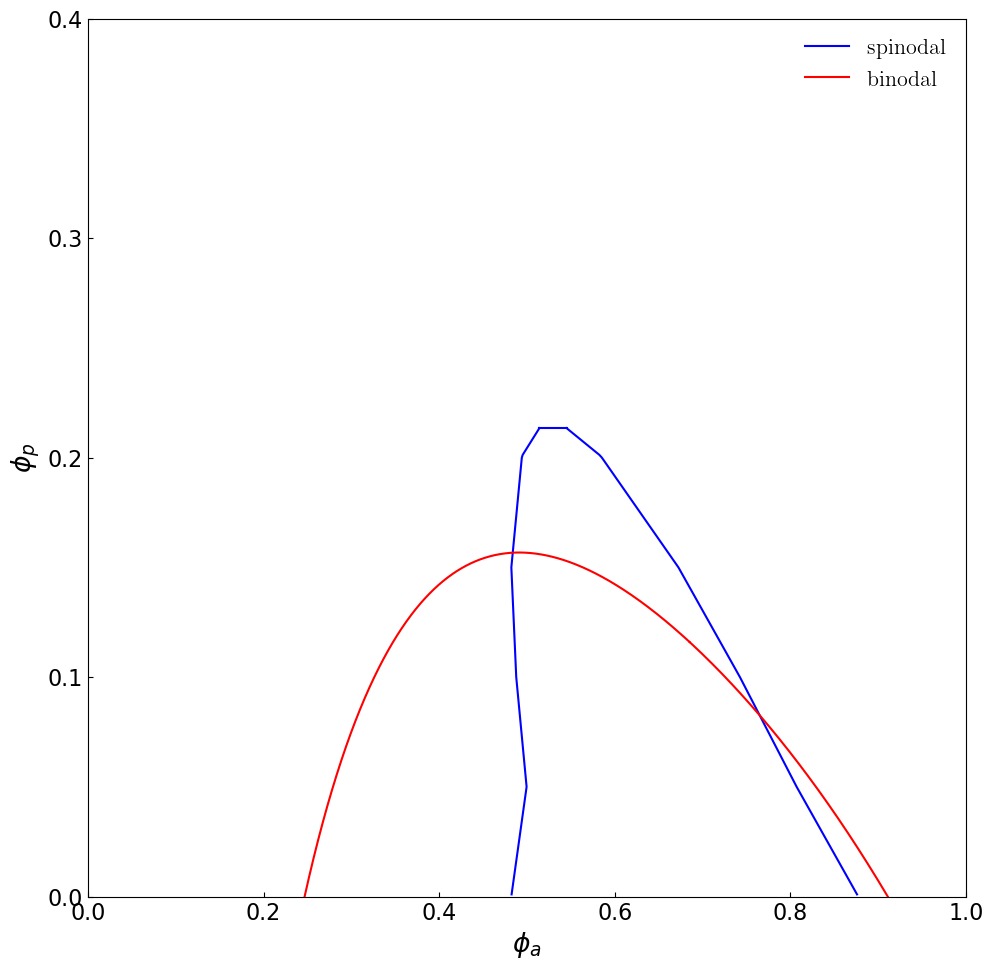

PyObject <matplotlib.legend.Legend object at 0x37a41e660>

In [5]:
# this command plots the phase diagram
fig, ax = plt.subplots(1,1,figsize=(10,10));
plot_phase_reduced(fig, ax, Pe, 16; Δϕ = Δϕ, shading = false, plot_tieline = false)

In [6]:
DT, v0, DR, N, Δx, Lx, Ly = (1.0, 20.0, 1.0, 50, 0.05, 2.0, 0.5);
δt, δ, T, save_interval = (1e-2, 0.1, 1.0, 0.1); # time-step parameters
ϕa, ϕp = (0.5, 0.1); # active and passive phase fractions
folder_name = "demo";
param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ;
                    T = T, name = folder_name, save_interval = save_interval, save_on = true);

# Demo to run particle simulation

In [7]:
# run a new particle simulation and save the results
t, η, w = run_new_sim(param)

(1.0000013159345655, [1.0 0.0 … 0.0 1.0; 0.0 0.0 … 0.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 0.0;;; -1.0 0.0 … 0.0 -1.0; 0.0 0.0 … 0.0 -1.0; … ; -1.0 -1.0 … -1.0 -1.0; -1.0 -1.0 … -1.0 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 2500.0, 2500.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0])

In [8]:
# load the saved results in a collated format
sim_ts, η_saves = load_compress_sim(param);

/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_sims_pro/demo/[DT,v0,DR,N,Lx,Ly,ϕa,ϕp]=[1.0, 20.0, 1.0, 50.0, 2.0, 0.5, 0.5, 0.1]/T=1.0_Δt=0.1.jld2
/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_sims_pro/demo/[DT,v0,DR,N,Lx,Ly,ϕa,ϕp]=[1.0, 20.0, 1.0, 50.0, 2.0, 0.5, 0.5, 0.1]/T=0.9_Δt=0.1.jld2
full load sim
saved


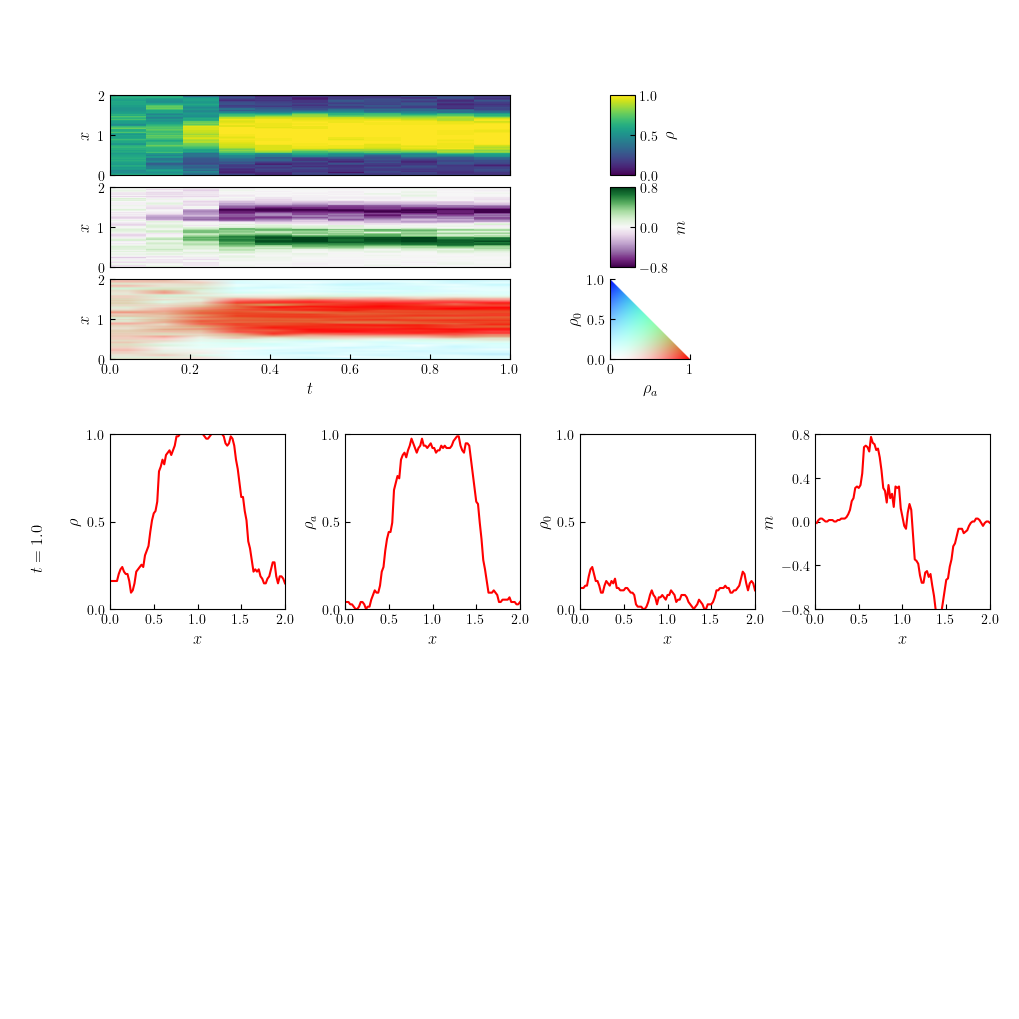

In [9]:
# plot the results
fig = plot_sim(sim_ts, η_saves, param);

# Demo to solve for time-dependent PDE solutions

In [10]:
t, f = run_new_pde(param);

max pert


/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/demo/[DT,v0,DR,Δx,Lx,ϕa,ϕp]=[1.0, 20.0, 1.0, 0.05, 2.0, 0.5, 0.1]/T=1.0_Δt=0.1.jld2
/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/demo/[DT,v0,DR,Δx,Lx,ϕa,ϕp]=[1.0, 20.0, 1.0, 0.05, 2.0, 0.5, 0.1]/T=0.9_Δt=0.1.jld2
full load pde
saved


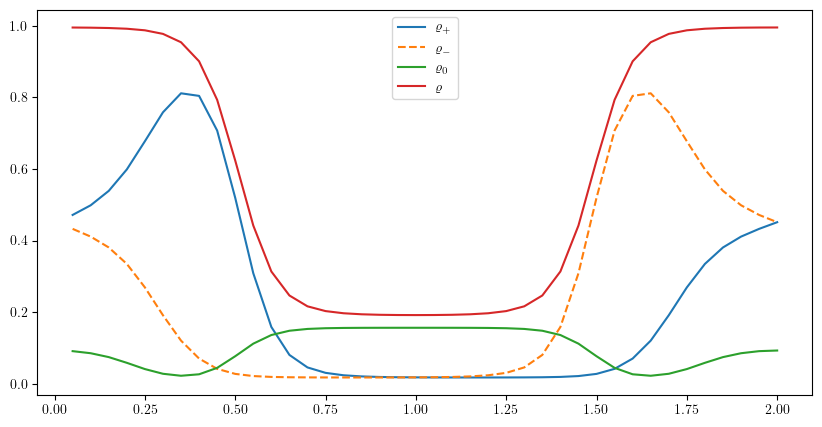

In [11]:
pde_ts, f_saves = load_compress_pde(param);

fig = plot_pde(param, f_saves[end]);

In [12]:
pde_ts

11-element Vector{Float64}:
 0.0
 0.10000925505752568
 0.2000742166944723
 0.30001085917644493
 0.40000300464286703
 0.5000263999210394
 0.6000754580308557
 0.7000441944052637
 0.8000507432783841
 0.9000236666025059
 1.0000614075793917

/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_sims_pro/demo/[DT,v0,DR,N,Lx,Ly,ϕa,ϕp]=[1.0, 20.0, 1.0, 50.0, 2.0, 0.5, 0.5, 0.1]/T=1.0_Δt=0.1.jld2
fast load sim
/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/demo/[DT,v0,DR,Δx,Lx,ϕa,ϕp]=[1.0, 20.0, 1.0, 0.05, 2.0, 0.5, 0.1]/T=1.0_Δt=0.1.jld2
/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/demo/[DT,v0,DR,Δx,Lx,ϕa,ϕp]=[1.0, 20.0, 1.0, 0.05, 2.0, 0.5, 0.1]/T=1.0_Δt=0.1.jld2
fast load pde


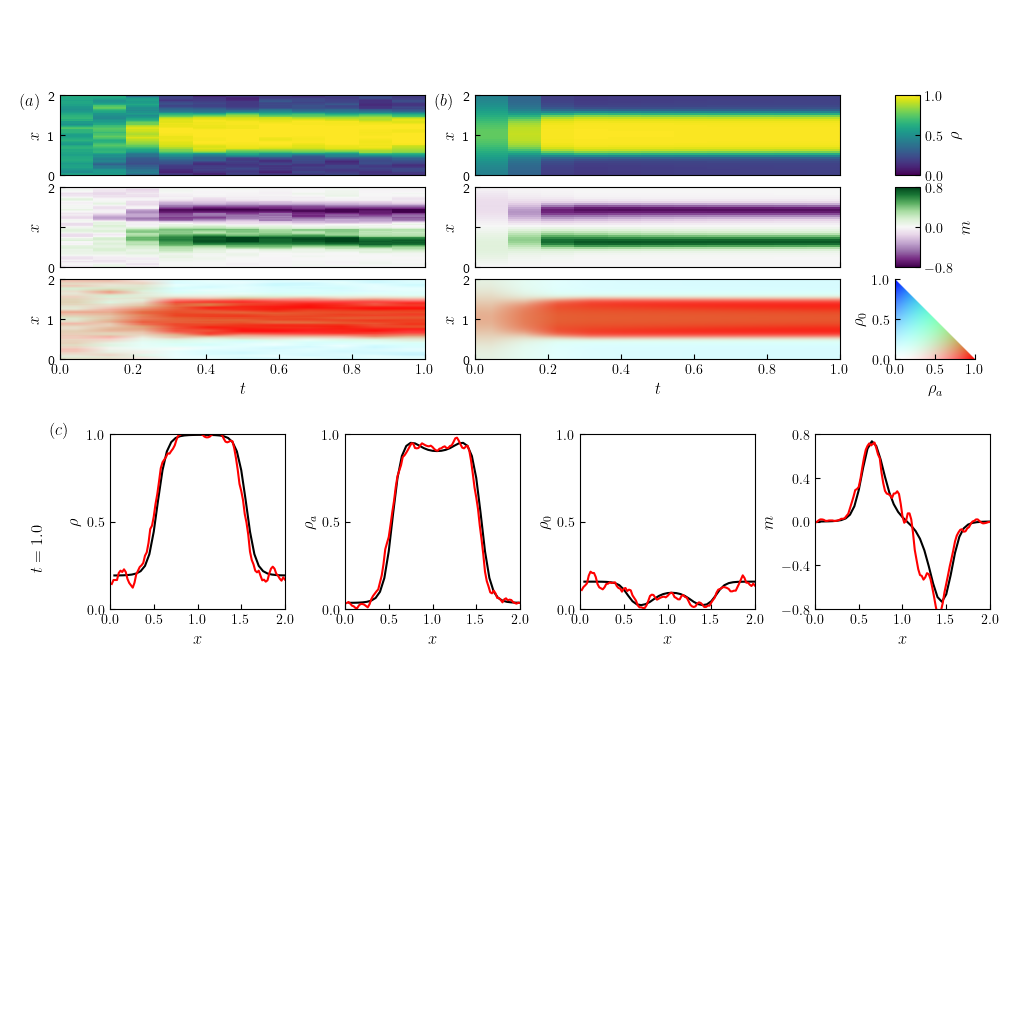

In [13]:
fig = create_figure(param);

# Demo to solve for travelling wave solutions (full problem)

In [14]:
# load an existing solution
Lx,Nx,ϕa,ϕp,v0 = (25.0,1600,0.45,0.3,7.5);
param, ps = get_param_full(Lx,Nx,ϕa,ϕp,v0);
f, u, c = load_full(Lx,Nx,ϕa,ϕp,v0);

/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/full_sol/sol_full/[DT,v0,DR,Lx,Nx,ϕa,ϕp]=[1.0, 7.5, 1.0, 25.0, 1600.0, 0.45, 0.3].jld2


In [15]:
ϕa = ϕa + 0.01;
param["ϕa"] = ϕa;
param["name"] = "demo";
param["save_on"] = false;
u0 = u; 
f, u, c = solve_full(Lx,Nx,ϕa,ϕp,v0,u0; tol = 1e-8, maxiters = 100)

([0.20351264932694643 0.21718532611592375 0.33963163071605457; 0.20365080478827252 0.21734203574494143 0.33966664991752926; … ; 0.20323734976552355 0.2168729310689932 0.3395603926553128; 0.20337483100892675 0.2170289577777562 0.33959621121331707], [0.7603296061589248; 0.7606594904507432; … ; 0.013654126768829442; 0.05539479335432505;;], 0.05539479335432505)

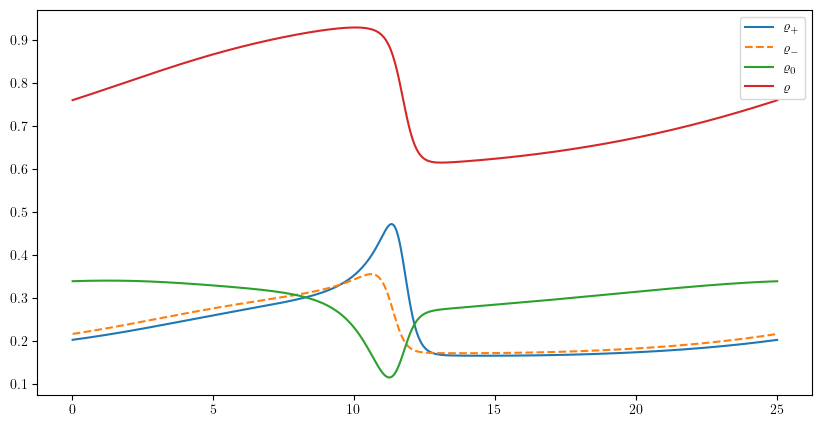

In [16]:
fig = plot_pde(param, f);

# Demo to solve for travelling wave solutions (reduced problem)

## No interface

In [17]:
Lx,Nx,ϕa,ϕp,v0 = (25.0,1024,0.45,0.35,7.5);
param, ps = get_param_outer0(Lx,Nx,ϕa,ϕp,v0);
f, u, c = load_outer0(Lx,Nx,ϕa,ϕp,v0);

/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/outer_sol/outer_sol_0/[DT,v0,DR,Nx,ϕa,ϕp]=[1.0, 7.5, 1.0, 1024.0, 0.45, 0.35].jld2


In [18]:
ϕa = ϕa + 0.02;
param["ϕa"] = ϕa;
param["name"] = "demo";
param["save_on"] = false;
u0 = u; 
f, u, c = solve_outer0(Lx,Nx,ϕa,ϕp,v0,u0; tol = 1e-8, maxiters = 100)

([0.2222370871783375 0.2222370871783375 0.3757577886746365; 0.2223295833383484 0.2223295833383484 0.3758050566938118; … ; 0.2220532877524474 0.2220532877524474 0.37566176253958344; 0.22214498853641565 0.22214498853641565 0.37571002292716876], [0.8040753659400568; 0.803756478689842; … ; 0.4829107581950694; 1.8817520984492022;;], 0.0752700839379681)

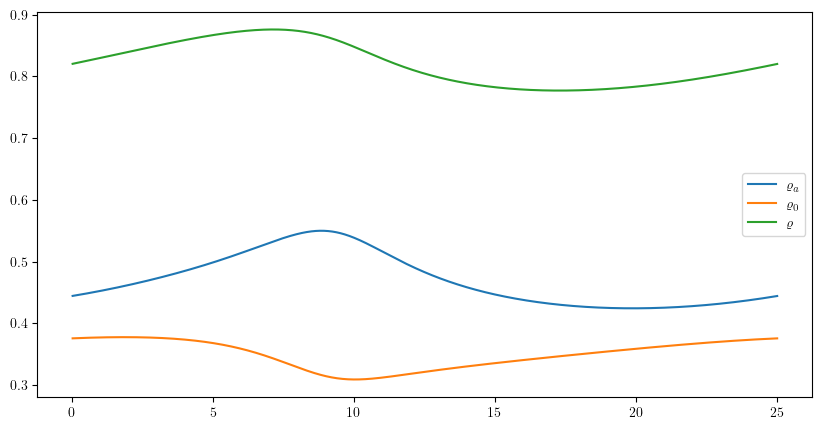

In [19]:
fig = plot_pde_outer(param, f);

## One interface

In [20]:
# Load existing solution as initial guess
Lx,Nx,ϕa,ϕp,v0 = (25.0,1024,0.45,0.3,7.5);
ϕ = ϕa + ϕp;
γ = 1.65; # active-passive interface parameter
param, ps = get_param_outer1(Lx,Nx,ϕa,ϕp,v0,ϕ,γ);
f, u, c = load_outer1(Lx,Nx,ϕa,ϕp,v0,ϕ,γ);

/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/outer_sol/outer_sol_1/[DT,v0,DR,Nx,ϕ,γ]=[1.0, 7.5, 1.0, 1024.0, 0.75, 1.65].jld2


In [21]:
ϕ = ϕ + 0.05;
param["ϕ"] = ϕ;
param["name"] = "demo";
param["save_on"] = false;
u0 = u; 
f, u, c = solve_outer1(Lx,Nx,ϕa,ϕp,v0,ϕ,γ,u0; tol = 1e-8, maxiters = 100);

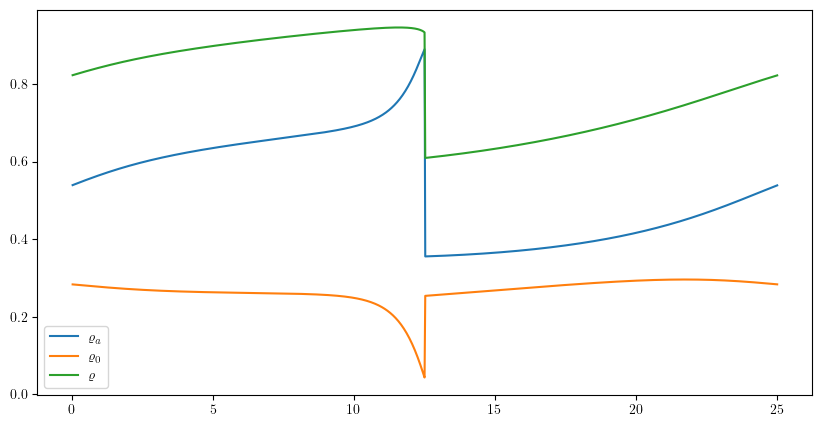

In [22]:
fig = plot_pde_outer(param, f);

## Two interfaces

In [23]:
# Load existing solution as initial guess
Lx,Nx,ϕa,ϕp,v0 = (25.0,1024,0.5405,0.195,7.5);
ϕ = ϕa + ϕp;
γ = 1.58; # active-passive interface parameter
ind = 704; # fixes the index of the second interface
param, ps = get_param_outer2(Lx,Nx,ϕa,ϕp,v0,ind,γ);
f, u, c = load_outer2(Lx,Nx,ϕa,ϕp,v0,ind,γ);

/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/outer_sol/outer_sol_2/[DT,v0,DR,Nx,ind,γ]=[1.0, 7.5, 1.0, 1024.0, 704.0, 1.58].jld2


In [24]:
ϕ = ϕ + 0.01;
param["ϕ"] = ϕ;
param["name"] = "demo";
param["save_on"] = false;
u0 = u; 
f, u, c = solve_outer2(Lx,Nx,ϕa,ϕp,v0,ind,γ,u0; tol = 1e-8, maxiters = 100);

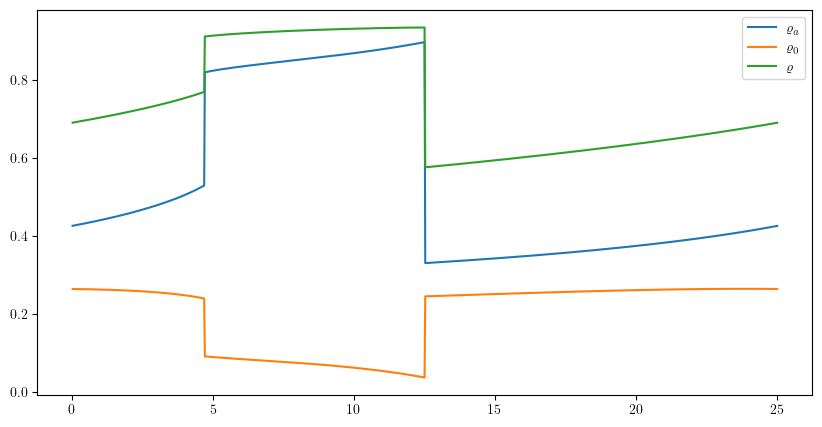

In [25]:
fig = plot_pde_outer(param, f);